In [3]:
import os
import math
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
cwd = os.getcwd()
%load_ext autoreload
%autoreload 2

In [4]:
from IPython.display import display
from matplotlib.lines import Line2D
pd.options.display.max_columns = None

In [5]:
plt.style.use(['science'])
os.environ["PATH"] += os.pathsep + '/Library/TeX/texbin'
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [6]:
import netwulf as nw

In [19]:
os.chdir(os.path.join(cwd,'../../..'))
import ExMAS.main
import ExMAS.utils
from ExMAS.utils import inData as inData
from ExMAS.main import matching

In [11]:
EXPERIMENT_NAME = 'res400_5'
KPIs = pd.read_csv('ExMAS/extras/game_results/{}_KPIs.csv'.format(EXPERIMENT_NAME), index_col = 0)
rides = pd.read_csv('ExMAS/extras/game_results/{}_rides.csv'.format(EXPERIMENT_NAME), index_col = 0)
rm = pd.read_csv('ExMAS/extras/game_results/{}_rm.csv'.format(EXPERIMENT_NAME), index_col = [0,1])

In [7]:
# data from log
# 23-02-21 04:20:27-WARNING-Prunings:  ['EXMAS']
# 23-02-21 04:20:27-WARNING-Pruned nRides 2191/2191
# 23-02-21 04:20:27-WARNING-Mutually exclusives 0
# 23-02-21 04:20:27-WARNING-Experiment-res400_5_Pricing-SUBGROUP_Objective-['total_group_cost']_Pruning-['EXMAS']_minmax-min
# 23-02-21 04:38:40-WARNING-Experiment-res400_5_Pricing-SUBGROUP_Objective-['total_group_cost']_Pruning-['EXMAS']_minmax-max
# 23-02-21 04:56:58-WARNING-Prunings:  ['TNE']
# 23-02-21 04:56:58-WARNING-Pruned nRides 1708/2191
# 23-02-21 04:56:58-WARNING-Mutually exclusives 0
# 23-02-21 04:56:58-WARNING-Experiment-res400_5_Pricing-SUBGROUP_Objective-['total_group_cost']_Pruning-['TNE']_minmax-min
# 23-02-21 05:11:23-WARNING-Experiment-res400_5_Pricing-SUBGROUP_Objective-['total_group_cost']_Pruning-['TNE']_minmax-max
# 23-02-21 05:25:43-WARNING-Prunings:  ['HERMETIC']
# 23-02-21 05:25:43-WARNING-Pruned nRides 1366/2191
# 23-02-21 05:25:43-WARNING-Mutually exclusives 0
# 23-02-21 05:25:43-WARNING-Experiment-res400_5_Pricing-SUBGROUP_Objective-['total_group_cost']_Pruning-['HERMETIC']_minmax-min
# 23-02-21 05:36:48-WARNING-Experiment-res400_5_Pricing-SUBGROUP_Objective-['total_group_cost']_Pruning-['HERMETIC']_minmax-max
# 23-02-21 05:47:57-WARNING-Prunings:  ['RUE']
# 23-02-21 05:47:57-WARNING-Pruned nRides 2191/2191
# 23-02-21 05:47:57-WARNING-Mutually exclusives 2762
# 23-02-21 05:47:57-WARNING-Experiment-res400_5_Pricing-SUBGROUP_Objective-['total_group_cost']_Pruning-['RUE']_minmax-min
# 23-02-21 06:06:21-WARNING-Experiment-res400_5_Pricing-SUBGROUP_Objective-['total_group_cost']_Pruning-['RUE']_minmax-max
# 23-02-21 06:24:46-WARNING-Prunings:  ['RSIE']
# 23-02-21 06:24:46-WARNING-Pruned nRides 2191/2191
# 23-02-21 06:24:46-WARNING-Mutually exclusives 24404
# 23-02-21 06:24:46-WARNING-Experiment-res400_5_Pricing-SUBGROUP_Objective-['total_group_cost']_Pruning-['RSIE']_minmax-min
# 23-02-21 06:43:46-WARNING-Experiment-res400_5_Pricing-SUBGROUP_Objective-['total_group_cost']_Pruning-['RSIE']_minmax-max
# 23-02-21 07:03:49-WARNING-Prunings:  ['TSE']
# 23-02-21 07:03:49-WARNING-Pruned nRides 2191/2191
# 23-02-21 07:03:49-WARNING-Mutually exclusives 0

In [12]:
PRICINGS = ['UNIFORM','EXTERNALITY','RESIDUAL','SUBGROUP']

for i,PRICING in enumerate(PRICINGS):
    
    for j, ALGO in enumerate(['EXMAS', 'TNE', 'HERMETIC', 'RUE', 'RSIE', 'TSE']):
        col_name = "pruned_Pricing-{}_Pruning-['{}']".format(PRICING, ALGO)
        rm[col_name] = rm.apply(lambda r: rides.loc[r.ride][col_name], axis = 1)

In [13]:
PRICING = 'SUBGROUP'
ret = dict()
for algo in ['EXMAS', 'TNE', 'HERMETIC']:
    pruning_column = "pruned_Pricing-{}_Pruning-['{}']".format(PRICING, algo)
    df = rides[rides[pruning_column]==True]

    r = df.groupby('degree').size()
    r['degree'] = df.degree.mean()
    r['number of groups'] = df.shape[0]
    ret[algo] = r
ret['RUE'] = ret['EXMAS']
ret['RSIE'] = ret['EXMAS']
df = pd.DataFrame(ret).fillna(0).T
df['mutually exclusives'] = ['-','-','-',2762,24404]
for i in [1,2,3,4,'number of groups']:
    df[i]=df[i].astype(int)
df['degree'] = df.degree.round(2)
df = df[['number of groups',1,2,3,4,'mutually exclusives','degree']]
print(df.to_latex())
df

\begin{tabular}{lrrrrrlr}
\toprule
{} &  number of groups &    1 &     2 &    3 &   4 & mutually exclusives &  degree \\
\midrule
EXMAS    &              2191 &  400 &  1348 &  363 &  79 &                   - &    2.06 \\
TNE      &              1708 &  400 &   928 &  305 &  74 &                   - &    2.03 \\
HERMETIC &              1366 &  400 &   806 &  142 &  18 &                   - &    1.84 \\
RUE      &              2191 &  400 &  1348 &  363 &  79 &                2762 &    2.06 \\
RSIE     &              2191 &  400 &  1348 &  363 &  79 &               24404 &    2.06 \\
\bottomrule
\end{tabular}



,number of groups,1,2,3,4,mutually exclusives,degree
EXMAS,2191,400,1348,363,79,-,2.06
TNE,1708,400,928,305,74,-,2.03
HERMETIC,1366,400,806,142,18,-,1.84
RUE,2191,400,1348,363,79,2762,2.06
RSIE,2191,400,1348,363,79,24404,2.06


In [14]:
col = 'indexes'
import json
rides[col] = rides[col].apply(lambda x: json.loads(x))
rm = pd.read_csv('ExMAS/extras/{}_rm.csv'.format(EXPERIMENT_NAME), index_col = [0,1])
EXPERIMENT_NAME = 'res400_5'

FileNotFoundError: [Errno 2] File ExMAS/extras/res400_5_rm.csv does not exist: 'ExMAS/extras/res400_5_rm.csv'

In [20]:
os.chdir("/Users/rkucharski/Documents/GitHub/ExMAS")
from IPython.display import display # to display images

In [21]:
requests = pd.DataFrame(index = rm.traveller.unique())

In [22]:
_, config, _ = nw.load("netwulf_config.json") # load config
_, config_schedule, _ = nw.load("netwulf_config_schedule.json") # load config

(2191, 118)
(1708, 118)
(1366, 118)


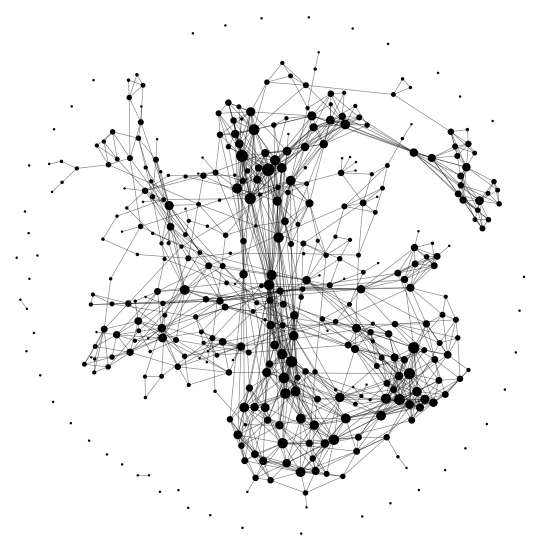

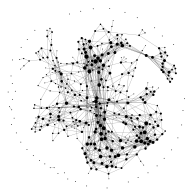

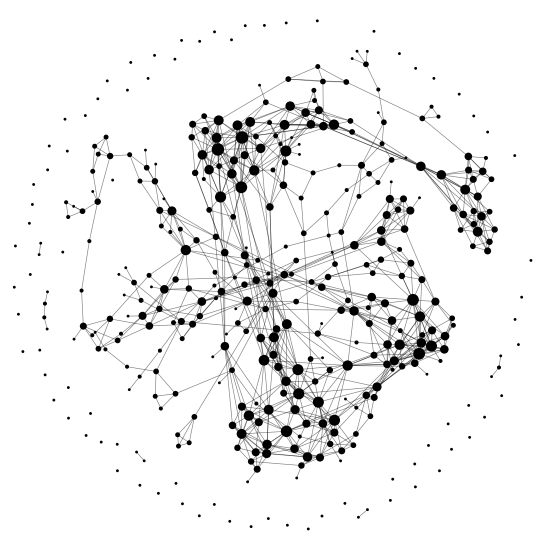

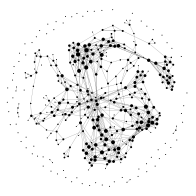

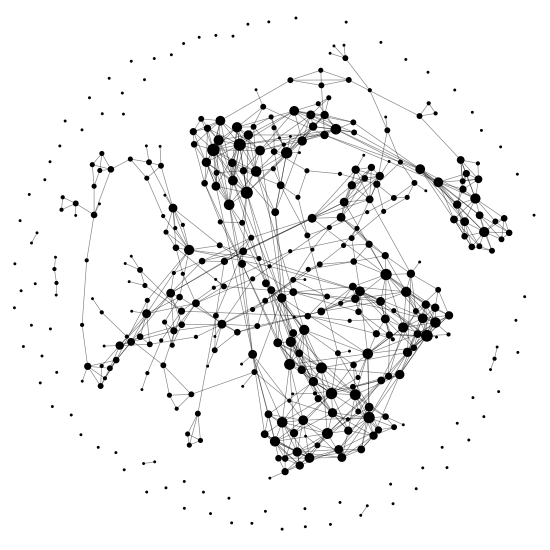

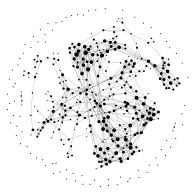

In [28]:
PRICING = 'SUBGROUP'
for algo in ['EXMAS', 'TNE', 'HERMETIC']:
    pruning_column = "pruned_Pricing-{}_Pruning-['{}']".format(PRICING, algo)
    matching_column = "Experiment-{}_Pricing-{}_Objective-['total_group_cost']_Pruning-['{}']_minmax-min".format(EXPERIMENT_NAME,PRICING,algo)
    print(rides[rides[pruning_column]==True].shape)
    fig, ax = plt.subplots(figsize = (10,10))
    G = ExMAS.utils.make_shareability_graph(requests, rides[rides[pruning_column]==True])
    f, _ = nw.visualize(G, config = config)
    _, _ = nw.draw_netwulf(f, fig = fig, ax = ax, figsize = (50,50))
    plt.savefig("g_{}_{}.png".format(algo,'pruning'))
    #fig, ax = plt.subplots(figsize = (10,10))
    #G = ExMAS.utils.make_shareability_graph(requests, rides[rides[matching_column]==1])
#     f, _ = nw.visualize(G, config = config_schedule)
#     _, _ = nw.draw_netwulf(f, fig = fig, ax = ax)
#     plt.savefig("g_{}_{}.png".format(algo,'matching'))

In [ ]:
#G = ExMAS.utils.make_shareability_graph(requests, rides[rides[matching_column]==1])
#stylized_network, config_schedule = nw.visualize(G)  # create config
#nw.save("netwulf_config_schedule.json", stylized_network, config_schedule) # save config

In [24]:
os.chdir("/Users/rkucharski/Documents/GitHub/ExMAS")
from IPython.display import display # to display images

g_EXMAS_pruning.png 0 550
(35, 25)
(550, 550)
g_TNE_pruning.png 0 550
(585, 25)
(550, 550)
g_HERMETIC_pruning.png 0 550
(1135, 25)
(550, 550)


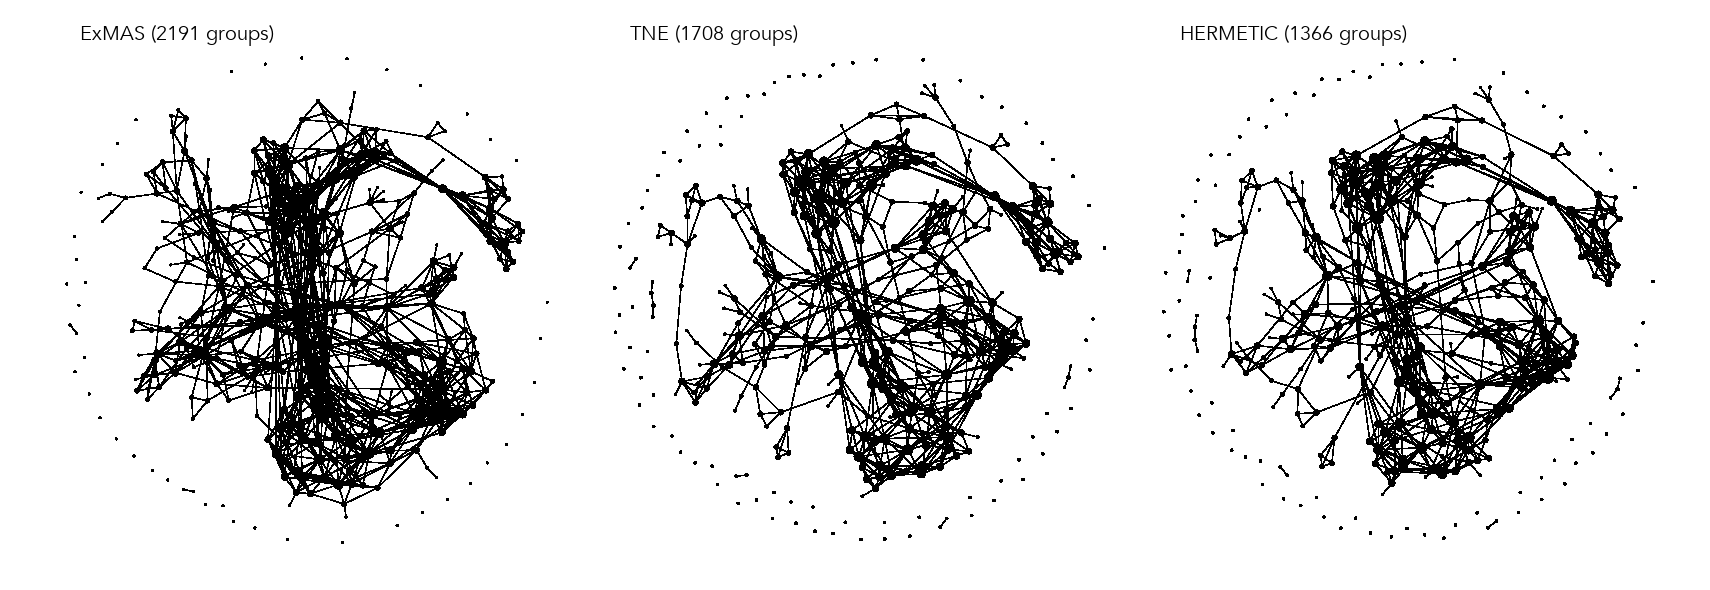

In [26]:
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw , ImageOps
size = 550
rows = 1
cols = 3
header = 20
col_names = ['EXMAS', 'TNE', 'HERMETIC']
col_titles = ['ExMAS', 'TNE', 'HERMETIC']
#names = ['a) PT travel time','b) Uber travel time', 'c) Time Gap', 'd) Cost Gap', 'e) Uber added value' ]
new_im = Image.new('RGB', (size*cols+3*header,size*rows+2*header), (255,255,255))
row_names = ['pruning']
font = ImageFont.truetype("Avenir.ttc", 20)
draw = ImageDraw.Draw(new_im) 
for i in range(0,size*cols,size): # kolumny
    shift = 10

    
    for j in range(0,size*rows,size): # wiersze
        
        PATH = 'g_{}_{}.png'.format(col_names[int(i/size)],row_names[int(j/size)])
        #'../data/results/figs/{}_{}_{}_{}.png'.format(file_header, level, CITIES[int(j/size)],  FIELDS[int(i/size)])
        print(PATH, j, size)
        im = Image.open(PATH)
        #im.thumbnail((size,size))
#         if i == 0:
#             txt=Image.new('L', (250,50))
#             d = ImageDraw.Draw(txt)
#             d.text( (0, 0), row_names[int(j/size)],  font=font, fill=255)
#             w=txt.rotate(90,  expand=1)
#             new_im.paste( ImageOps.colorize(w, (0,0,0), (0,0,0)), (int(header/3),j-100),  w)
        print((header+i+int(size/100)+shift,20+j+int(size/100)))
        print(im.size)
        new_im.paste(im, (header+i+int(size/100)+shift,20+j+int(size/100)))
    draw.text((int(header)+i+10+50, 20),
              col_titles[int(i/size)]+" ("+str(int(df['number of groups'][int(i/size)]))+ " groups)",
              (0,0,0),font=font)
#         im = Image.open('../data/results/figs/scale_1.png')
#         im.thumbnail((size*0.8,header))
#         new_im.paste(im, (400,3*size+header))
#         im = Image.open('../data/results/figs/scale_2.png')
#         im.thumbnail((size*0.8,header))
#         new_im.paste(im, (header+1400,3*size+header))
#         im = Image.open('../data/results/figs/scale_3.png')
#         im.thumbnail((size*0.8,header))
#         new_im.paste(im, (header+2150,3*size+header))
new_im.save('grafs.jpg', quality = 250, optimize = True)

display(new_im)       

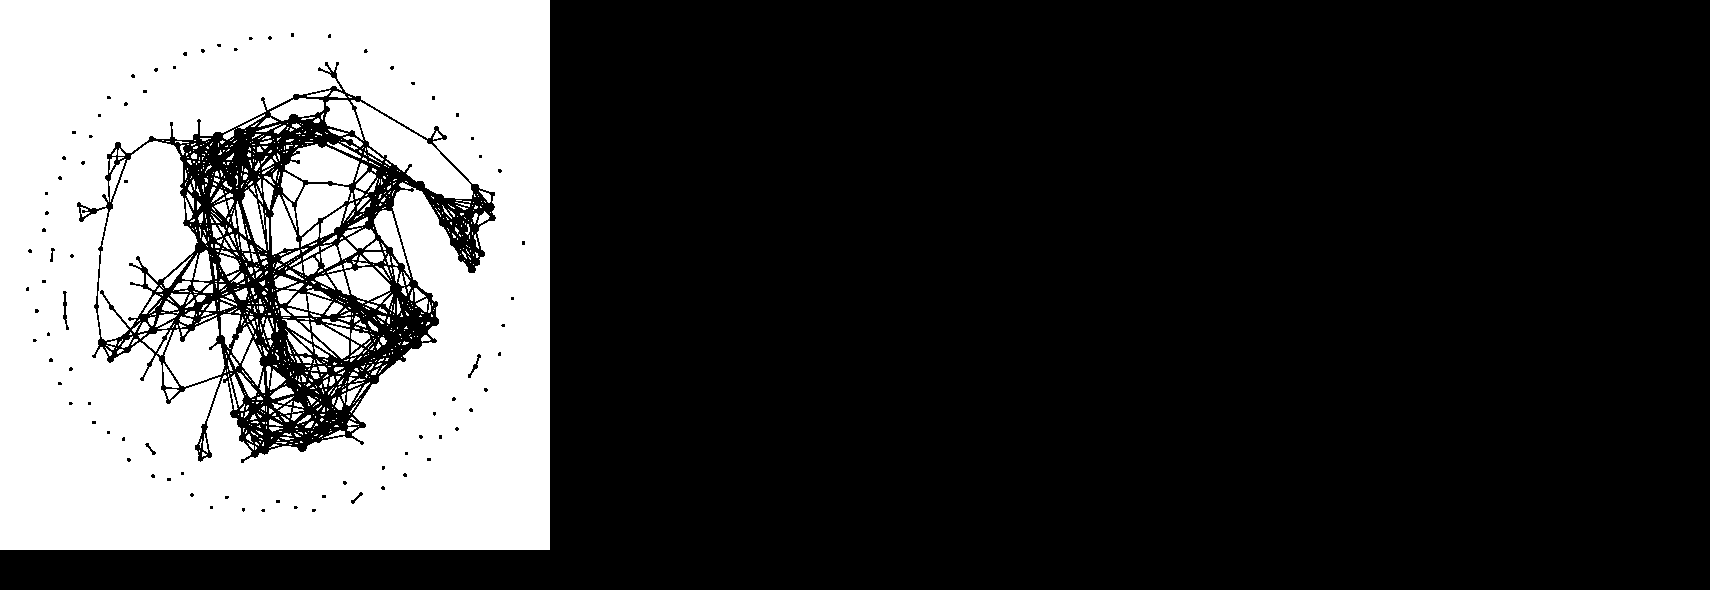

In [79]:
new_im = Image.new('RGB', (size*cols+3*header,size*rows+2*header), (255,255,255))
im = Image.open("g_TNE_pruning.png")
new_im.paste(im, ((0,0)))
new_im

---
(c) Rafał Kucharski, Delft, 2020